<a href="https://colab.research.google.com/github/Konoko2004/TheProject/blob/main/yFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Install related libraries

!pip install yfinance
!pip install dash
!pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import date

In [14]:
#test list comprehension with unpacking function
import collections

persontype = collections.namedtuple('person',['first_Name','last_Name','Age'])
profiles = [['Winston','Loke',31],['Ad','Loke',22]]

namedpeople = [persontype(*i) for i in profiles]
namedpeople




[person(first_Name='Winston', last_Name='Loke', Age=31),
 person(first_Name='Ad', last_Name='Loke', Age=22)]

In [ ]:
# df1 = pd.DataFrame([[1,2,3,4]],
#                    columns = ['a','b','c','d'])
# df2 = pd.DataFrame([[1,2,3,4,5],[1,4,9,16,25],[1,16,87,12,41]],
#                    columns = ['a','b','c','d','e'])

# print(pd.concat([df1,df2],axis=1))

     a    b    c    d  a   b   c   d   e
0  1.0  2.0  3.0  4.0  1   2   3   4   5
1  NaN  NaN  NaN  NaN  1   4   9  16  25
2  NaN  NaN  NaN  NaN  1  16  87  12  41


In [12]:
def create_Stock(*tickerName):

    frames = []

    for i in tickerName:
        stock = yf.Ticker(i)
        stockhistory = stock.history(period = 'max')
        stock_df = pd.DataFrame(stockhistory)
        stock_df['Ticker'] = i
        stock_df.reset_index(inplace = True)                                    #push date index to become a column
        stock_df['Date'] = stock_df['Date'].dt.strftime('%d/%m/%Y')             #dd/mm/yyyy format
        frames.append(stock_df)
    
    return frames
        
    

In [36]:
stockList = create_Stock('nio','tsla','msft','pltr','plug','ocgn','dis')
stockList = pd.concat(stockList)
stockList['High-Low'] = stockList['High'] - stockList['Low']
stockList = stockList[['Date','Ticker','Open','High','Low','Close','High-Low','Volume','Dividends','Stock Splits']]
stockList['Ticker'].unique()

array(['nio', 'tsla', 'msft', 'pltr', 'plug', 'ocgn', 'dis'], dtype=object)

In [41]:
stockList

,Date,Ticker,Open,High,Low,Close,High-Low,Volume,Dividends,Stock Splits
0,12/09/2018,nio,6.000000,6.930000,5.350000,6.600000,1.580000,66849000,0.0,0.0
1,13/09/2018,nio,6.620000,12.690000,6.520000,11.600000,6.170000,158346500,0.0,0.0
2,14/09/2018,nio,12.660000,13.800000,9.220000,9.900000,4.580000,172473600,0.0,0.0
3,17/09/2018,nio,9.610000,9.750000,8.500000,8.500000,1.250000,56323900,0.0,0.0
4,18/09/2018,nio,8.730000,9.100000,7.670000,7.680000,1.430000,41827600,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14950,24/05/2021,dis,172.449997,175.110001,171.750000,174.309998,3.360001,7346700,0.0,0.0
14951,25/05/2021,dis,175.600006,177.449997,175.399994,176.169998,2.050003,8089700,0.0,0.0
14952,26/05/2021,dis,176.619995,177.899994,176.199997,176.470001,1.699997,8086200,0.0,0.0
14953,27/05/2021,dis,177.199997,179.589996,176.789993,179.039993,2.800003,13567800,0.0,0.0


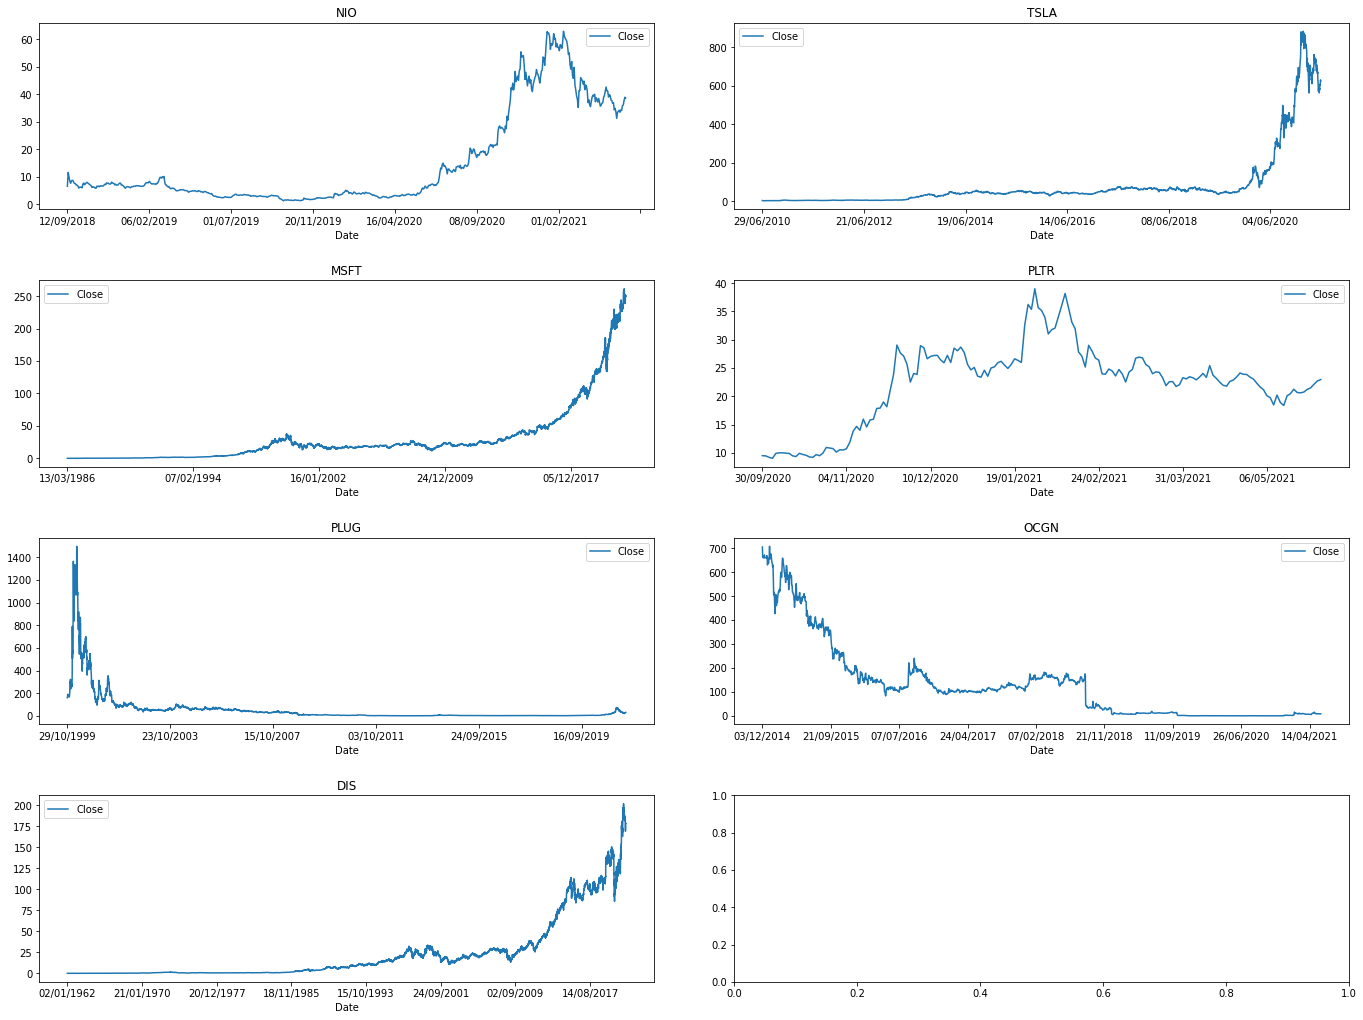

In [52]:


#Store each ticker in a list with seperate index
#so that we can plot each stock later on

TickerDF = []
stock_count = len(stockList['Ticker'].unique())
for i in stockList['Ticker'].unique():
    TickerDF.append(stockList[stockList['Ticker'] ==i])

#configuration for nrow and ncol depending on len of TickerDF. We want to have a 2 column fig.
def calculate_fig_row(x):                                                       #math to calculate ceiling division. Doesnt work on negative values though. This value will be used nrow
    return ((x+(2-1))//2)

df_ceiling = calculate_fig_row(len(TickerDF))                                            

df_counter = 0
nrow = df_ceiling
ncol = 2


#create subplots
# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
# Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax.
# fig, axes = plt.subplots  is more concise than using fig = plt.figure()

fig, axes = plt.subplots(nrow, ncol)
fig.set_size_inches(20, 15)
fig.tight_layout(pad=5)  #add a gap between plots.                                           

for i in range(nrow):
    for j in range(ncol):
        if (len(TickerDF) > df_counter):

            TickerDF[df_counter].plot(x = 'Date',y = 'Close', ax=axes[i,j])     #dataframe.plot function, giving it a x and y axis by column name, as well as plotting it on matplotlib axes.
            axes[i,j].set_title(str.upper(TickerDF[df_counter]['Ticker'].iloc[0]))
            df_counter += 1


In [43]:
str.upper

,Date,Ticker,Open,High,Low,Close,High-Low,Volume,Dividends,Stock Splits
0,12/09/2018,nio,6.000000,6.930000,5.350000,6.600000,1.580000,66849000,0.0,0.0
1,13/09/2018,nio,6.620000,12.690000,6.520000,11.600000,6.170000,158346500,0.0,0.0
2,14/09/2018,nio,12.660000,13.800000,9.220000,9.900000,4.580000,172473600,0.0,0.0
3,17/09/2018,nio,9.610000,9.750000,8.500000,8.500000,1.250000,56323900,0.0,0.0
4,18/09/2018,nio,8.730000,9.100000,7.670000,7.680000,1.430000,41827600,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
678,24/05/2021,nio,34.259998,36.490002,33.560001,35.889999,2.930000,67244400,0.0,0.0
679,25/05/2021,nio,36.320000,37.639999,35.689999,36.070000,1.950001,76628000,0.0,0.0
680,26/05/2021,nio,36.250000,38.080002,36.070000,37.759998,2.010002,55929000,0.0,0.0
681,27/05/2021,nio,37.950001,38.980000,37.180000,38.910000,1.799999,53064400,0.0,0.0


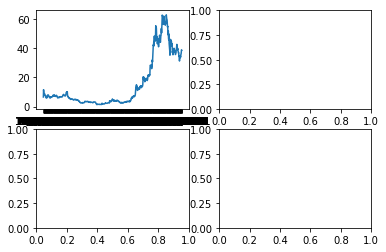

In [45]:
df_counter = 0
nrow = 2
ncol = 2

fig, axes = plt.subplots(nrow, ncol)


#axes in fig , plot x axis by y axis.
axes[0,0].plot(TickerDF[0]['Date'],TickerDF[0]['Close'])

In [38]:
TickerDF[0][['Date','Close']].plot(ax=axes)

,Date,Ticker,Open,High,Low,Close,High-Low,Volume,Dividends,Stock Splits
0,12/09/2018,nio,6.000000,6.930000,5.350000,6.600000,1.580000,66849000,0.0,0.0
1,13/09/2018,nio,6.620000,12.690000,6.520000,11.600000,6.170000,158346500,0.0,0.0
2,14/09/2018,nio,12.660000,13.800000,9.220000,9.900000,4.580000,172473600,0.0,0.0
3,17/09/2018,nio,9.610000,9.750000,8.500000,8.500000,1.250000,56323900,0.0,0.0
4,18/09/2018,nio,8.730000,9.100000,7.670000,7.680000,1.430000,41827600,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
678,24/05/2021,nio,34.259998,36.490002,33.560001,35.889999,2.930000,67244400,0.0,0.0
679,25/05/2021,nio,36.320000,37.639999,35.689999,36.070000,1.950001,76628000,0.0,0.0
680,26/05/2021,nio,36.250000,38.080002,36.070000,37.759998,2.010002,55929000,0.0,0.0
681,27/05/2021,nio,37.950001,38.980000,37.180000,38.910000,1.799999,53064400,0.0,0.0


0
1


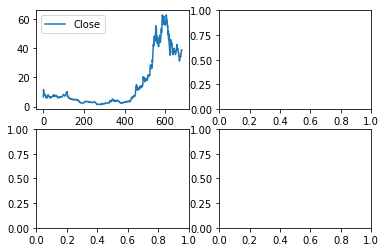

In [ ]:
fig, axes = plt.subplots(2, 2)
TickerDF[0][['Date','Close']].plot(ax=axes[0,0])


TickerDF

for i in range(ncol):
  print(i)

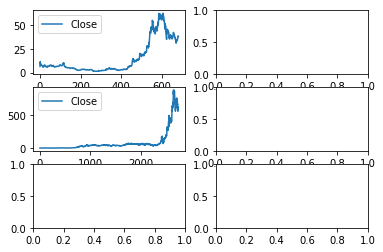

In [ ]:
#Example of Multi plotting


fig, axes = plt.subplots(3, 2)
TickerDF[0][['Date','Close']].plot(ax = axes[0,0])
TickerDF[1][['Date','Close']].plot(ax = axes[1,0])

AttributeError: ignored

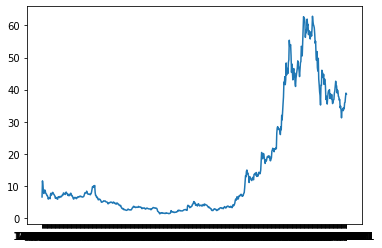

In [ ]:
fig, ax = plt.subplots()
ax.plot(stockList[stockList['Ticker']=='nio']['Date'],stockList[stockList['Ticker']=='nio']['Close'])
fig.plot(stockList[stockList['Ticker']=='tsla']['Date'],stockList[stockList['Ticker']=='tsla']['Close'])

In [ ]:
fig = plt.figure()
n = 1                                                                           #Axes count

print(list(enumerate(TickerDF)))

[(0,            Date Ticker       Open  ...     Volume  Dividends  Stock Splits
0    12/09/2018    nio   6.000000  ...   66849000        0.0           0.0
1    13/09/2018    nio   6.620000  ...  158346500        0.0           0.0
2    14/09/2018    nio  12.660000  ...  172473600        0.0           0.0
3    17/09/2018    nio   9.610000  ...   56323900        0.0           0.0
4    18/09/2018    nio   8.730000  ...   41827600        0.0           0.0
..          ...    ...        ...  ...        ...        ...           ...
678  24/05/2021    nio  34.259998  ...   67244400        0.0           0.0
679  25/05/2021    nio  36.320000  ...   76628000        0.0           0.0
680  26/05/2021    nio  36.250000  ...   55929000        0.0           0.0
681  27/05/2021    nio  37.950001  ...   53064400        0.0           0.0
682  28/05/2021    nio  38.740002  ...   58159400        0.0           0.0

[683 rows x 10 columns]), (1,             Date Ticker        Open  ...    Volume  Dividends  S

<Figure size 432x288 with 0 Axes>

In [ ]:
nio_tidied = pd.melt(nio,id_vars=['Volume','Dividends','Stock Splits','Date','Ticker'],
                     var_name='Position',value_name = 'Price')

nio_tidied

,Volume,Dividends,Stock Splits,Date,Ticker,Position,Price
0,59847900,0,0,26/05/2020,nio,Open,3.420000
1,70718900,0,0,27/05/2020,nio,Open,4.010000
2,62756900,0,0,28/05/2020,nio,Open,3.980000
3,50303000,0,0,29/05/2020,nio,Open,3.820000
4,69222000,0,0,01/06/2020,nio,Open,4.000000
...,...,...,...,...,...,...,...
1265,48991700,0,0,20/05/2021,nio,High-Low,0.869999
1266,49419300,0,0,21/05/2021,nio,High-Low,0.910000
1267,67244400,0,0,24/05/2021,nio,High-Low,2.930000
1268,76545800,0,0,25/05/2021,nio,High-Low,1.950001
